# Implement Multiple Linear Regression

In [3]:
# 1
import numpy as np
import pandas as pd
from scipy import stats
df=pd.read_csv('AI-MLData/quikr_car.csv')
#df.head()
#df.info()
#df.isna().sum()
#df.head()
#df['Price'].unique()
df=df[df['Price']!='Ask For Price']
df['Price'].unique()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [9]:
#2
df.isnull().sum()
df.dropna(inplace=True)
#df.info()
#df.isnull().sum()
#df.info()
df['Price']=df['Price'].str.replace(',','').astype(int)
df.info()

ValueError: invalid literal for int() with base 10: 'Ask For Price'

In [15]:
#3
df=df[df['year'].str.isnumeric()]
df['year']=df['year'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.2+ KB


In [55]:
#4
df['kms_driven'].unique()
df['kms_driven']=df['kms_driven'].str.split(' ')
.str.get(0).str.replace(',','').astype(int)
df['kms_driven'].unique()


array([ 45000,     40,  28000,  36000,  41000,  25000,  24530,  60000,
        30000,  32000,  48660,   4000,  16934,  43000,  35550,  39522,
        39000,  55000,  72000,  15975,  70000,  23452,  35522,  48508,
        15487,  82000,  20000,  68000,  38000,  27000,  33000,  46000,
        16000,  47000,  35000,  30874,  15000,  29685, 130000,  19000,
        54000,  13000,  38200,  22000,  50000,  13500,   3600,  45863,
        60500,  12500,  18000,  13349,  29000,  44000,  42000,  14000,
        49000,  36200,  51000, 104000,  33333,  33600,   5600,   7500,
        24330,  65480, 200000,  59000,  99000,   2800,  21000,  11000,
        66000,   3000,   7000,  38500,  37200,  43200,  24800,  45872,
        40000,  11400,  97200,  52000,  31000, 175430,  37000,  65000,
         3350,  75000,  62000,  73000,   2200,  54870,  34580,  97000,
           60,  80200,   3200,      0,   5000,    588,  71200, 175400,
         9300,  56758,  10000,  56450,  56000,  32700,   9000,     73,
      

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    object
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.2+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1941c4bd700>,
 'caps': [<matplotlib.lines.Line2D at 0x1941c4bdd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1941c4bd490>],
 'medians': [<matplotlib.lines.Line2D at 0x1941c4be270>],
 'fliers': [<matplotlib.lines.Line2D at 0x1941c4be510>],
 'means': []}

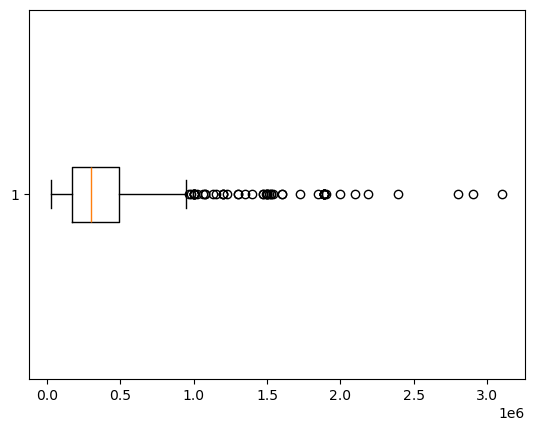

In [68]:
#5 Check Outlier in target Variable
import matplotlib.pyplot as plt
plt.boxplot(df['Price'],vert=0)


In [63]:
df.describe()

,Price,kms_driven
count,8.160000e+02,816.000000
mean,4.117176e+05,46275.531863
std,4.751844e+05,34297.428044
min,3.000000e+04,0.000000
25%,1.750000e+05,27000.000000
50%,2.999990e+05,41000.000000
75%,4.912500e+05,56818.500000
max,8.500003e+06,400000.000000


In [75]:
#6 
df=df[df['Price'] < 3e6].reset_index(drop=True)

In [77]:
df.describe()

,Price,kms_driven
count,8.140000e+02,814.000000
mean,3.984786e+05,46318.572482
std,3.698963e+05,34319.114534
min,3.000000e+04,0.000000
25%,1.750000e+05,27000.000000
50%,2.999990e+05,41000.000000
75%,4.899998e+05,56939.500000
max,2.900000e+06,400000.000000


In [79]:
#7 Save the cleaned data
df.to_csv('cleaneddata.csv')

In [82]:
#8 Deal with Categorical Data
df['fuel_type'].value_counts()

fuel_type
Petrol    427
Diesel    385
LPG         2
Name: count, dtype: int64

In [85]:
#9 
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [93]:
#10 
df.replace({'fuel_type':{'Petrol':0,'Diesel':1,'LPG':2}},
           inplace=True)
df.fuel_type.unique()

C:\Users\skjha\AppData\Local\Temp\ipykernel_13012\1608337565.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fuel_type':{'Petrol':0,'Diesel':1,'LPG':2}},inplace=True)


array([0, 1, 2], dtype=int64)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        814 non-null    object
 1   company     814 non-null    object
 2   year        814 non-null    object
 3   Price       814 non-null    int32 
 4   kms_driven  814 non-null    int32 
 5   fuel_type   814 non-null    int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 31.9+ KB


In [97]:
#11 Model Creation
X=df.drop(['name','company','Price'],axis=1)
Y=df['Price']


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [101]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size
                                     =.2,random_state=2)

In [103]:
lm=LinearRegression()

In [105]:
lm.fit(X_Train,Y_Train)

LinearRegression()

In [109]:
lm.coef_


array([ 2.53389674e+04, -1.37853065e+00,  1.66899620e+05])

In [113]:
lm.intercept_

-50607820.6577458

In [121]:
#12 Prediction
Y_Predict=lm.predict(X_Test)
data={"year":[2004],"kms_driven":[9000],"fuel_type":[1]}
datatotest=pd.DataFrame(data)
lm.predict(datatotest)


array([325962.94228911])

In [127]:
#14 Accuracy
accuracy=r2_score(Y_Test,Y_Predict)
print("Accuracy of the model is :",accuracy)

Accuracy of the model is : 0.16763529058571158


In [131]:
#15
Analysis=X_Test.copy()
Analysis['PricePredicted']=Y_Predict
Analysis["Y"]=Y


In [133]:
Analysis

,year,kms_driven,fuel_type,PricePredicted,Y
197,2012,65000,1,451476.965648,285000
250,2012,36200,1,491178.648257,329500
556,2013,52800,1,493634.006973,549900
465,2014,44000,1,531104.044102,399000
15,2014,16934,1,568415.354571,500000
...,...,...,...,...,...
603,2012,80000,1,430799.005955,600000
231,2014,33000,0,379368.260821,311000
205,2012,35000,1,492832.885032,400000
537,2013,140000,1,373426.134629,550000
